In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np

In [2]:
def extract_scalar_arrays(scalar_events):
    wall_times = []
    steps = []
    values = []

    for event in scalar_events:
        wall_times.append(event.wall_time)
        steps.append(event.step)
        values.append(event.value)

    return np.array(wall_times), np.array(steps), np.array(values)

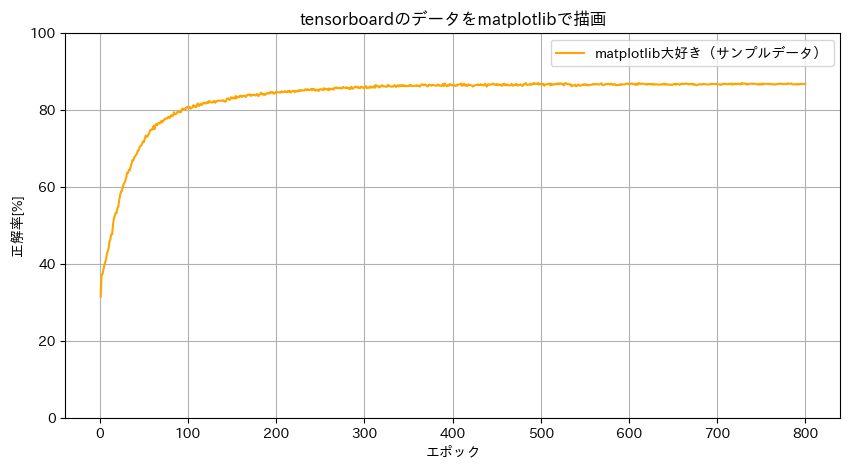

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# 新しい図を作成
plt.figure(figsize=(10, 5))

# グラフごとに色を指定
colors = ["orange"]

labels = ["matplotlib大好き（サンプルデータ）"]

accumulator = EventAccumulator("runs/pre-train/resnet18/SwAV/DINO/DINO")
accumulator.Reload()
wall_times, steps, values = extract_scalar_arrays(accumulator.Scalars("test_top1"))

plt.plot(steps, values, label=labels[0], color=colors[0])
plt.title(
    "tensorboardのデータをmatplotlibで描画",
)
plt.xlabel("エポック")
plt.ylabel("正解率[%]")
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.savefig("matplotlib.svg", format="svg", bbox_inches="tight")
plt.show()